In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = YOLO("yolov8n.pt")

/home/sonal/data_science/MSM/venv/lib/python3.12/site-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_locatio

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="IpTkLQYulTj6VTFolbLy")
project = rf.workspace("msm-3qpcp").project("msm")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
model.train(
    data='/home/sonal/data_science/MSM/Description_Scanner/msm-1/data.yaml', 
    epochs=100, 
    imgsz=240, 
    batch=16, 
    name='yolov8n_custom'
)

New https://pypi.org/project/ultralytics/8.3.11 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.3 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/sonal/data_science/MSM/Description_Scanner/msm-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buff

: 

In [48]:
results=model.predict(source="/home/sonal/data_science/MSM/images.jpeg", task="detect", mode="predict")


image 1/1 /home/sonal/data_science/MSM/images.jpeg: 192x256 1 Name, 43.9ms
Speed: 12.1ms preprocess, 43.9ms inference, 22.2ms postprocess per image at shape (1, 3, 192, 256)


In [49]:
results[0].plot()

array([[[171, 171, 171],
        [171, 171, 171],
        [171, 171, 171],
        ...,
        [165, 165, 165],
        [165, 165, 165],
        [165, 165, 165]],

       [[171, 171, 171],
        [171, 171, 171],
        [171, 171, 171],
        ...,
        [165, 165, 165],
        [165, 165, 165],
        [165, 165, 165]],

       [[171, 171, 171],
        [171, 171, 171],
        [171, 171, 171],
        ...,
        [165, 165, 165],
        [165, 165, 165],
        [165, 165, 165]],

       ...,

       [[209, 208, 210],
        [209, 208, 210],
        [210, 209, 211],
        ...,
        [208, 207, 217],
        [208, 207, 217],
        [208, 207, 217]],

       [[209, 208, 210],
        [209, 208, 210],
        [209, 208, 210],
        ...,
        [208, 207, 217],
        [208, 207, 217],
        [208, 207, 217]],

       [[212, 211, 213],
        [212, 211, 213],
        [212, 211, 213],
        ...,
        [207, 208, 218],
        [207, 208, 218],
        [207, 208, 218]]

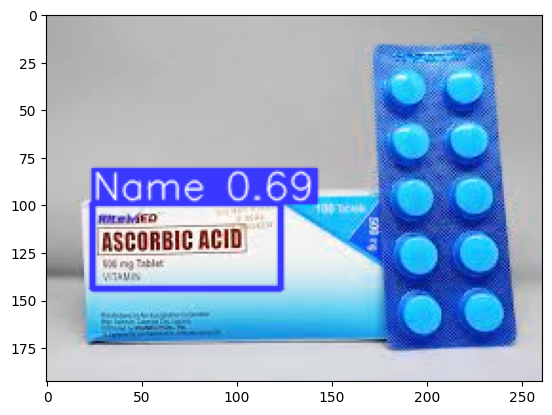

In [76]:
for result in results:
    img_with_boxes = result.plot()

    plt.imshow(img_with_boxes)
    plt.show()

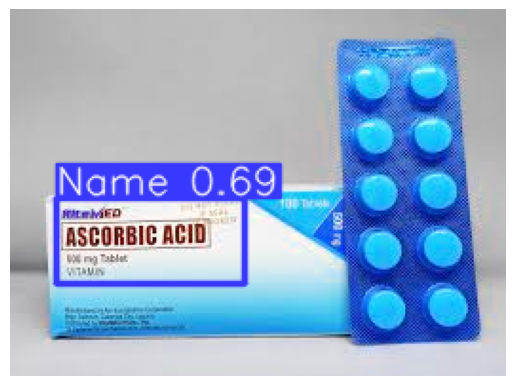

In [74]:
import numpy as np

plt.imshow(results[0].plot())
plt.axis('off')
plt.show()